<a href="https://colab.research.google.com/github/nelslindahlx/NLP/blob/master/visualize_word_frequency_v4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


Welcome to the Webpage Word Frequency Analyzer!
You can analyze the website content of any URL.
Enter the URL in the format: 'http://example.com' or 'https://example.com'.
Press Enter to use the default website: 'https://www.civichonors.com'.
Enter the URL to analyze (or press Enter to use the default): 

Optional: Add any additional stopwords to exclude from the analysis.
Separate words by commas (e.g., 'civic, honors'). Press Enter to skip.
Enter additional stopwords: 

Visualizing Word Frequency as a Bar Chart...



Generating Word Cloud...


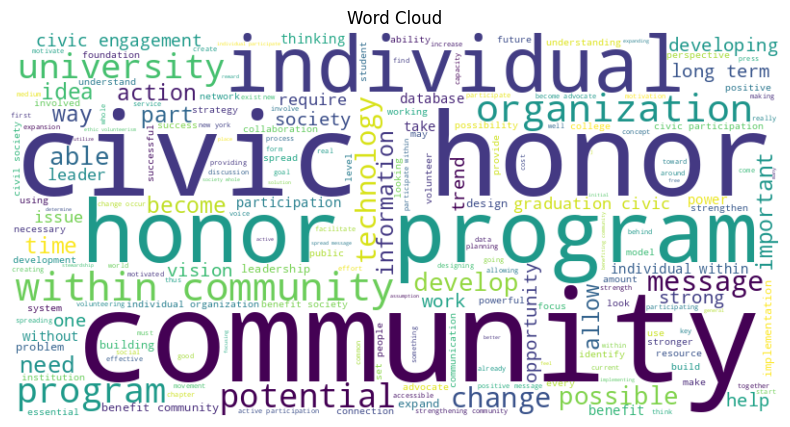


Do you want to save the word frequency report and word cloud? (yes/no): no


In [2]:
# Install required libraries
!pip install requests beautifulsoup4 matplotlib nltk plotly wordcloud

# Import required libraries
import requests
from bs4 import BeautifulSoup
from collections import Counter
import matplotlib.pyplot as plt
from wordcloud import WordCloud
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
import plotly.express as px

# Download NLTK data
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('omw-1.4')

# Function to fetch and parse webpage content
def extract_text_from_webpage(url):
    try:
        # Validate URL
        if not url.startswith(('http://', 'https://')):
            raise ValueError("Invalid URL: Please include 'http://' or 'https://'")

        # Fetch the webpage
        response = requests.get(url)
        response.raise_for_status()  # Raise HTTPError for bad responses

        # Parse the HTML content
        soup = BeautifulSoup(response.text, 'html.parser')

        # Remove script and style elements
        for script_or_style in soup(['script', 'style']):
            script_or_style.decompose()

        # Extract and return text
        return soup.get_text(separator=' ')
    except requests.exceptions.RequestException as e:
        print(f"Error fetching the URL: {e}")
        return ""
    except ValueError as ve:
        print(ve)
        return ""

# Function to clean, lemmatize, and process text
def clean_and_lemmatize_text(text, additional_stopwords=None):
    stop_words = set(stopwords.words('english'))
    if additional_stopwords:
        stop_words.update(additional_stopwords)
    lemmatizer = WordNetLemmatizer()

    # Remove non-ASCII characters and split into words
    words = ''.join([char if char.isalpha() or char.isspace() else ' ' for char in text]).split()

    # Convert words to lowercase, remove stopwords, and lemmatize
    filtered_words = [
        lemmatizer.lemmatize(word.lower())
        for word in words
        if word.lower() not in stop_words
    ]
    return filtered_words

# Function to analyze word frequency
def analyze_word_frequency(words, num_common=10):
    word_counts = Counter(words)
    return word_counts.most_common(num_common)

# Function to visualize word frequency interactively
def plot_word_frequency_interactive(word_frequency):
    words, counts = zip(*word_frequency)
    data = {'Word': words, 'Frequency': counts}
    fig = px.bar(
        data,
        x='Word',
        y='Frequency',
        title='Interactive Word Frequency on Webpage',
        text='Frequency',
    )
    fig.update_traces(textposition='outside')
    fig.update_layout(xaxis_title='Words', yaxis_title='Frequency')
    fig.show()

# Function to generate a word cloud
def generate_word_cloud(words):
    wordcloud = WordCloud(width=800, height=400, background_color='white').generate(' '.join(words))
    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.title('Word Cloud')
    plt.show()

# Prompt user for URL with clear instructions
print("Welcome to the Webpage Word Frequency Analyzer!")
print("You can analyze the website content of any URL.")
print("Enter the URL in the format: 'http://example.com' or 'https://example.com'.")
print("Press Enter to use the default website: 'https://www.civichonors.com'.")

# Get URL from user or default to civichonors.com
url = input("Enter the URL to analyze (or press Enter to use the default): ").strip()
if not url:
    url = 'https://www.civichonors.com'

# Additional stopwords prompt
print("\nOptional: Add any additional stopwords to exclude from the analysis.")
print("Separate words by commas (e.g., 'civic, honors'). Press Enter to skip.")
additional_stopwords_input = input("Enter additional stopwords: ").strip()
additional_stopwords = [word.strip().lower() for word in additional_stopwords_input.split(',') if word.strip()]

# Step 1: Extract text from the webpage
text = extract_text_from_webpage(url)

# Step 2: Clean, lemmatize, and process text
cleaned_words = clean_and_lemmatize_text(text, additional_stopwords)

# Step 3: Analyze word frequency
num_common_words = 10  # Customize the number of most common words to visualize
word_frequency = analyze_word_frequency(cleaned_words, num_common=num_common_words)

# Step 4: Visualize word frequency interactively
print("\nVisualizing Word Frequency as a Bar Chart...")
plot_word_frequency_interactive(word_frequency)

# Step 5: Generate and display word cloud
print("\nGenerating Word Cloud...")
generate_word_cloud(cleaned_words)

# Optional: Save outputs
save_report = input("\nDo you want to save the word frequency report and word cloud? (yes/no): ").strip().lower()
if save_report == 'yes':
    # Save word frequency to a CSV file
    import csv
    with open('word_frequency.csv', 'w', newline='', encoding='utf-8') as file:
        writer = csv.writer(file)
        writer.writerow(['Word', 'Frequency'])
        writer.writerows(word_frequency)
    print("Word frequency report saved as 'word_frequency.csv'.")

    # Save word cloud image
    wordcloud = WordCloud(width=800, height=400, background_color='white').generate(' '.join(cleaned_words))
    wordcloud.to_file('word_cloud.png')
    print("Word cloud saved as 'word_cloud.png'.")